In [2]:
import string

def read_file(corpus):

    data = []

    with open(corpus, "r") as file:
        for line in file.readlines():
            words_tags = line.strip("\n").split(" ")
            words = [(wt.split("_"))[0] for wt in words_tags][:-1]
            words = " ".join(words)
            result = words.translate(str.maketrans('', '', string.punctuation))
            words = result.split(" ")
            tags = [(wt.split("_"))[1] for wt in words_tags][:-1]
            tags = [t for t in tags if t != 'PU']
            data.append((words, tags))

    return data


In [3]:
train_file = "./macmorpho-v3/macmorpho-train.txt"
test_file = "./macmorpho-v3/macmorpho-test.txt"
validation_file = "./macmorpho-v3/macmorpho-dev.txt"

train_data = read_file(train_file)
test_data = read_file(test_file)
validation_data = read_file(validation_file)


In [4]:
print(len(train_data))
print(len(test_data))
print(len(validation_data))

37948
9987
1997


In [5]:
train_data[0]

(['Jersei',
  'atinge',
  'média',
  'de',
  'Cr',
  '14',
  'milhão',
  'na',
  'venda',
  'da',
  'Pinhal',
  'em',
  'São',
  'Paulo'],
 ['N',
  'V',
  'N',
  'PREP',
  'CUR',
  'NUM',
  'N',
  'PREP+ART',
  'N',
  'PREP+ART',
  'NPROP',
  'PREP',
  'NPROP',
  'NPROP'])

In [6]:
words, tags = set([]), set([])

for sentence in train_data:
    for w in sentence[0]:
        words.add(w.lower())
    
    for t in sentence[1]:
        tags.add(t)

for sentence in validation_data:
    for w in sentence[0]:
        words.add(w.lower())
    
    for t in sentence[1]:
        tags.add(t)        

word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0 # the special value usd for padding
word2index['-OOV-'] = 1 # the special value used for OOVs

tag2index = {t: i + 1 for i, t in enumerate(list(tags))}
tag2index['-PAD-'] = 0 # the special value used to padding

print(len(words))
print(len(tags))

47202
25


In [7]:
print(tag2index.keys())

dict_keys(['ADJ', 'PREP', 'IN', 'PREP+ADV', 'KS', 'PRO-KS', 'V', 'KC', 'N', 'ART', 'PREP+PROSUB', 'PCP', 'PROPESS', 'PREP+ART', 'PREP+PROPESS', 'PROSUB', 'NPROP', 'PDEN', 'PREP+PRO-KS', 'ADV-KS', 'ADV', 'CUR', 'PREP+PROADJ', 'NUM', 'PROADJ', '-PAD-'])


In [8]:
def convert_dataset(data, word2index, tag2index):

    new_data = []
    sentences = []
    tags = []
    for sentence in data:
        int_sentence = []
        int_tags = []
        for w in sentence[0]:
            try:
                int_sentence.append(word2index[w.lower()])
            except KeyError:
                int_sentence.append(word2index['-OOV-'])
        for t in sentence[1]:
            int_tags.append(tag2index[t])
        sentences.append(int_sentence)
        tags.append(int_tags)
        new_data.append((int_sentence, int_tags))

    return new_data, sentences, tags

In [9]:
train_data, train_sents, train_tags = convert_dataset(train_data, word2index, tag2index)
validation_data, valid_sents, valid_tags = convert_dataset(validation_data, word2index, tag2index)
test_data, test_sents, test_tags = convert_dataset(test_data, word2index, tag2index)

In [10]:
train_data[0]

([18645,
  38244,
  26938,
  12235,
  45587,
  20940,
  45067,
  16104,
  33265,
  30524,
  44415,
  24134,
  42996,
  11579],
 [9, 7, 9, 2, 22, 24, 9, 14, 9, 14, 17, 2, 17, 17])

In [11]:
MAX_LENGTH = len(max(test_sents, key=len))
print(MAX_LENGTH)

247


In [12]:
from keras.preprocessing.sequence import pad_sequences

train_sents = pad_sequences(train_sents, maxlen=MAX_LENGTH, padding='post')
test_sents = pad_sequences(test_sents, maxlen=MAX_LENGTH, padding='post')
valid_sents = pad_sequences(valid_sents, maxlen=MAX_LENGTH, padding='post')
train_tags = pad_sequences(train_tags, maxlen=MAX_LENGTH, padding='post')
test_tags = pad_sequences(test_tags, maxlen=MAX_LENGTH, padding='post')
valid_tags = pad_sequences(valid_tags, maxlen=MAX_LENGTH, padding='post')


Using TensorFlow backend.
/Users/Pedro/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Pedro/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Pedro/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Pedro/anaconda3/lib/python3.7/site-packages/tenso

In [13]:
train_sents[0]

array([18645, 38244, 26938, 12235, 45587, 20940, 45067, 16104, 33265,
       30524, 44415, 24134, 42996, 11579,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(InputLayer(input_shape=(MAX_LENGTH, )))
model.add(Embedding(len(word2index), 128))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(len(tag2index))))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 247, 128)          6042112   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 247, 512)          788480    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 247, 26)           13338     
_________________________________________________________________
activation_1 (Activation)    (None, 247, 26)           0         
Total params: 6,843,930
Trainable params: 6,843,930
Non-trainable params: 0
_________________________________________________________________


In [20]:
import numpy as np

def to_categorical(tags, categories):
    cat_sequences = []
    for t in tags:
        cats = []
        for item in t:
            cats.append(np.zeros(categories))
            cats[-1][item] = 1.0
        cat_sequences.append(cats)
    return np.array(cat_sequences)

cat_train_tags = to_categorical(train_tags, len(tag2index))
cat_test_tags = to_categorical(test_tags, len(tag2index))
cat_valid_tags = to_categorical(valid_tags, len(tag2index))

In [21]:
model.fit(train_sents, cat_train_tags, batch_size=128, epochs=10, validation_data=(valid_sents, cat_valid_tags))

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 37948 samples, validate on 1997 samples
Epoch 1/10
37948/37948 [==============================] - 1334s 35ms/step - loss: 0.2365 - accuracy: 0.9396 - val_loss: 0.1731 - val_accuracy: 0.9460
Epoch 2/10
37948/37948 [==============================] - 1309s 35ms/step - loss: 0.1582 - accuracy: 0.9506 - val_loss: 0.1420 - val_accuracy: 0.9559
Epoch 3/10
37948/37948 [==============================] - 1341s 35ms/step - loss: 0.1272 - accuracy: 0.9601 - val_loss: 0.1210 - val_accuracy: 0.9609
Epoch 4/10
37948/37948 [==============================] - 1308s 34ms/step - loss: 0.1038 - accuracy: 0.9662 - val_loss: 0.1002 - val_accuracy: 0.9668
Epoch 5/10
37948/37948 [==============================] - 1302s 34ms/step - loss: 0.0817 - accuracy: 0.9728 - val_loss: 0.0834 - val_accuracy: 0.9727
Epoch 6/10
37948/37948 [==============================] - 1305s 34ms/step -

In [22]:
from keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [23]:
scores = model.evaluate(test_sents, cat_test_tags)

9987/9987 [==============================] - 162s 16ms/step


In [41]:
y_pred = model.predict_classes(test_sents)

In [42]:
print(model.metrics_names[1])
print(scores[1]*100)

accuracy
97.91194200515747


In [43]:
history = model.history
print(history.history)

{'val_loss': [0.1731132472238961, 0.14204011385925544, 0.12098578499461271, 0.10021304630552702, 0.0833999932812164, 0.07518302822745795, 0.07174481641786601, 0.06919025868535579, 0.06846943539443706, 0.06962718681045693], 'val_accuracy': [0.9460465908050537, 0.9559014439582825, 0.9608684182167053, 0.9667598605155945, 0.9727404713630676, 0.9752848148345947, 0.976231575012207, 0.9770283102989197, 0.9775331020355225, 0.9779061079025269], 'loss': [0.23651484111733315, 0.15822822358952038, 0.12715189494573492, 0.10382853305536464, 0.08173692309578089, 0.06724865990953487, 0.05881137347854678, 0.05288152550724606, 0.048285490452624404, 0.0445581254066042], 'accuracy': [0.93959045, 0.9506461, 0.96011716, 0.96622205, 0.97281265, 0.9775084, 0.9800535, 0.98200285, 0.9835638, 0.9848012]}


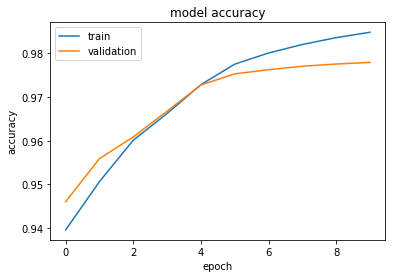

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

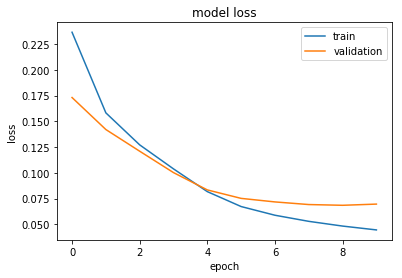

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [46]:
copytest_data = read_file(test_file)
copytest_data, copytest_sents, copytest_tags = convert_dataset(copytest_data, word2index, tag2index)

In [47]:
tags_names = {}
tags_total = {}
tags_accuracy = {}

for t, id_ in tag2index.items():
    tags_names[id_] = t
    tags_total[t] = 0
    tags_accuracy[t] = 0
    
total = 0.0
corrects = 0.0
for j in range(0, len(copytest_tags)):
    tags = copytest_tags[j]
    tags_pred = y_pred[j]
    for i in range(0, len(tags)):
        tags_total[tags_names[tags[i]]] += 1
        total += 1
        if tags[i] == tags_pred[i]:
            tags_accuracy[tags_names[tags[i]]] += 1
            corrects += 1

for t, correct in tags_accuracy.items():
    if t != "-PAD-":
        tags_accuracy[t] = correct/tags_total[t]
        print(t, tags_accuracy[t], tags_total[t])

print(float(corrects)/total)

PROADJ 0.5513608428446005 3417
CUR 0.6655405405405406 296
N 0.7518957214811535 36134
PREP+PROPESS 0.4523809523809524 126
V 0.7050930161634644 19674
NUM 0.5212554628526023 2517
ART 0.7070747217806042 12580
PREP+PRO-KS 0.0 58
PREP+ADV 0.0 31
NPROP 0.6306185170956589 15618
PCP 0.5413554633471646 3615
PREP+PROADJ 0.6666666666666666 309
ADV 0.6365642817730366 5437
IN 0.061224489795918366 98
PREP+PROSUB 0.27564102564102566 156
PREP+ART 0.677725582305735 10218
PRO-KS 0.5822323462414578 2195
ADJ 0.5177874955678998 8461
PROPESS 0.6636521739130434 2875
PROSUB 0.419065898912348 1563
PREP 0.667779234712123 16778
KS 0.5145784081954294 2538
PDEN 0.5142332415059688 1089
ADV-KS 0.10434782608695652 230
KC 0.6011917898918561 4531
0.6634140184929322


In [35]:
from keras.models import model_from_json
from keras.models import load_model


# load json and create model
json_file = open('keras-results/model3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("keras-results/model3.h5")

# summarize model.
print(loaded_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         6155776   
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 512)         788480    
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 27)          13851     
_________________________________________________________________
activation_3 (Activation)    (None, None, 27)          0         
Total params: 6,958,107
Trainable params: 6,958,107
Non-trainable params: 0
_________________________________________________________________
None
